<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_04_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 04 - Convolutional Neural Networks (CNN)

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 4 – Redes Neurais Convolucionais

Implementar uma rede CNN
– Usar MNIST, MNIST-Fashion, ou CIFAR-10 (ou outro dataset)

• Avaliar diferentes topologias (>5 topologias) e parâmetros

• Calcular a matriz de confusão para os dois melhores modelos

• Avaliar a diferença entre os modelos (top-2)

• Treinar uma rede MLP (já implementada no trabalho anterior) e
comparar com a rede CNN gerada: acurácia e número de
parâmetros

#Project Report

## Introduction 


Convolutional neural networks is a machine learning technique inspired by the experiment in cats and later in dogs on the way of capturing information by the visual cortex from which it can be concluded that many neurons in the visual cortex have a small local receptive . In this way, a reaction occurs in which the visual stimuli are located in a limited region of the visual field. A posteriori it was observed that some neurons have the ability to recognize patterns of only straight lines and/or specific shapes.

It was on this understanding that convolutional neural networks were architected. A convolutional layer is a region from which neurons will be linked to a region of pixels to which a set of filters is added. Filters are responsible for “learning” patterns in the image set so that, if in a certain region, that pattern appears again in an image, it can then be recognized by the neuron that learned it.

The calcularion of a output from an single neuron in a convolutional layer is

$$
z_{i,j,k}=b_k + \sum^{f_h-1}_u \sum^{f_w-1}_v \sum^{f_{n'}-1}_k x_{i',j',k'} \cdot w_{u,v,k',k} 
$$
$$
\text{with }\left\{\begin{array}{r}
i'= i\times s_h + u \\
j'= j\times s_w + v 
\end{array}\right.
$$

Where $z_{i,j,k}$ is the neuron output in row $i$ and column $j$ in feature map $k$ in layer $l$, $s_h$ and $s_w$ are the vertical steps and horizontally, $f_h$ and $f_w$ are the dimensions of the receptive field. $x_{i',j',k'}$ is the output of a neuron in the previous layer $(l-1)$, row $i'$, column $j'$ in map $k'$, $b_k $ is the bies in the map $k$ layer $l$ and $w_{u,v,k',k}$ is the weight of any neuron in a map $k$ in a layer $l$ located in lin $u $, column $v$ for map $k'$.

In this way, neural network architectures are designed from a set of hypertangles that vary from the number of filters, to the size of the exploration region of the network in the image, padding responsible for maintaining the dimensionality after passing the filter in that particular image, stride, by how many pixels will we skip to the next analysis among others.

http://alexlenail.me/NN-SVG/LeNet.html


<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" width = 300>

font ="https://medium.com/analytics-vidhya/multi-layer-perceptron-using-keras-on-mnist-dataset-for-digit-classification-problem-relu-a276cbf05e97"

## Metodology 


In this work, we explore the performance of 2D convolutional neural network topologies using Keras as a backend. In it, we will analyze the scoring metric to classify Mnist handwritten data.

The Keras API allows in each layer a set of several hypermeters which allows for designing several sets of hyperparameters illustrated in the code below.


```
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```
font https://keras.io/api/layers/convolution_layers/convolution2d/

In these experiments, we limited ourselves to testing the impact of multiple layers with an increment of twice the number of filters for each layer and observing the impact of this hypermeter on the network score using as model an exemple provid by Keras web site.


A simple MLP comparison test was carried out to see which of the methodologies had the best performance. We then built 6 MLP architectures, the first of which is simply composed of 10 input neurons and 10 output neurons in search of a generalization of each image per neuron, and the second added hyperparameters. In the third architecture, we had a layer of 28*28 neurons in an attempt to generalize a pixel per neuron and then hidden layers with 28*28/2^n were added to each layer in search of a generalization in each lower layer with several neurons that were half of the previous layer. In the last 2 models, we advanced the process with more layers so that we had 6 models.



## Datasets

We use the MNist a Keras native datasets. The Mnist are a grayscale images labeled 0, 9 imagens. Mniste is a classic set used for image classification composed of images of handwritten numbers.

<img src="https://thumbs.gfycat.com/SmoggyLittleFlickertailsquirrel-max-1mb.gif" width =800>

https://gfycat.com/smoggylittleflickertailsquirrel



## Plots and Results


<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P4_Metrics_CNN.png?raw=true" width = 500>

<img src="https://github.com/barauna-lo/Neurocomputing/blob/main/figures/P4_Metrics_MLP.png?raw=true" width = 500>



## Extras

Bellow is the summary of all CNN and MLP models.




### CNN Architectures 


#### MODEL CNN 1 

```

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_126 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_125 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 flatten_52 (Flatten)        (None, 6272)              0         
                                                                 
 dropout_52 (Dropout)        (None, 6272)              0         
                                                                 
 dense_52 (Dense)            (None, 10)                62730     
                                                                 
=================================================================
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________
None

#### MODEL CNN 2 
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_127 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_128 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 7, 7, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_53 (Flatten)        (None, 3136)              0         
                                                                 
 dropout_53 (Dropout)        (None, 3136)              0         
                                                                 
 dense_53 (Dense)            (None, 10)                31370     
                                                                 
=================================================================
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
_________________________________________________________________
None

```

#### MODEL CNN 3

```
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_129 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_128 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_130 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_129 (MaxPooli  (None, 7, 7, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_131 (Conv2D)         (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 3, 3, 128)        0         
 ng2D)                                                           
                                                                 
 flatten_54 (Flatten)        (None, 1152)              0         
                                                                 
 dropout_54 (Dropout)        (None, 1152)              0         
                                                                 
 dense_54 (Dense)            (None, 10)                11530     
                                                                 
=================================================================
Total params: 104,202
Trainable params: 104,202
Non-trainable params: 0
_________________________________________________________________
None
```
#### MODEL CNN 4 
```
Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_132 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_133 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 7, 7, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_134 (Conv2D)         (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 3, 3, 128)        0         
 ng2D)                                                           
                                                                 
 conv2d_135 (Conv2D)         (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_134 (MaxPooli  (None, 1, 1, 256)        0         
 ng2D)                                                           
                                                                 
 flatten_55 (Flatten)        (None, 256)               0         
                                                                 
 dropout_55 (Dropout)        (None, 256)               0         
                                                                 
 dense_55 (Dense)            (None, 10)                2570      
                                                                 
=================================================================
Total params: 390,410
Trainable params: 390,410
Non-trainable params: 0
_________________________________________________________________
None
```
#### MODEL CNN 5
```
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_136 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_137 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_136 (MaxPooli  (None, 5, 5, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_138 (Conv2D)         (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_137 (MaxPooli  (None, 2, 2, 128)        0         
 ng2D)                                                           
                                                                 
 conv2d_139 (Conv2D)         (None, 2, 2, 256)         295168    
                                                                 
 max_pooling2d_138 (MaxPooli  (None, 1, 1, 256)        0         
 ng2D)                                                           
                                                                 
 flatten_56 (Flatten)        (None, 256)               0         
                                                                 
 dropout_56 (Dropout)        (None, 256)               0         
                                                                 
 dense_56 (Dense)            (None, 10)                2570      
                                                                 
=================================================================
Total params: 390,410
Trainable params: 390,410
Non-trainable params: 0
_________________________________________________________________
None
```
#### MODEL CNN 6
```
Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_140 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_139 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_141 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_140 (MaxPooli  (None, 7, 7, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_142 (Conv2D)         (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_141 (MaxPooli  (None, 2, 2, 128)        0         
 ng2D)                                                           
                                                                 
 conv2d_143 (Conv2D)         (None, 2, 2, 256)         295168    
                                                                 
 max_pooling2d_142 (MaxPooli  (None, 1, 1, 256)        0         
 ng2D)                                                           
                                                                 
 flatten_57 (Flatten)        (None, 256)               0         
                                                                 
 dropout_57 (Dropout)        (None, 256)               0         
                                                                 
 dense_57 (Dense)            (None, 10)                2570      
                                                                 
=================================================================
Total params: 390,410
Trainable params: 390,410
Non-trainable params: 0
_________________________________________________________________
None
```


### MLP Architectures



#### MODEL MLP 1
```

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten_85 (Flatten)        (None, 784)               0         
                                                                 
 dense_161 (Dense)           (None, 10)                7850      
                                                                 
 dense_162 (Dense)           (None, 10)                110       
                                                                 
=================================================================
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None

```
#### MODEL MLP 2
```

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten_86 (Flatten)        (None, 784)               0         
                                                                 
 dense_163 (Dense)           (None, 10)                7850      
                                                                 
 dropout_118 (Dropout)       (None, 10)                0         
                                                                 
 batch_normalization_60 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_164 (Dense)           (None, 10)                110       
                                                                 
=================================================================
Total params: 8,000
Trainable params: 7,980
Non-trainable params: 20
_________________________________________________________________
None

```
#### MODEL MLP 3
```

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten_87 (Flatten)        (None, 784)               0         
                                                                 
 dense_165 (Dense)           (None, 784)               615440    
                                                                 
 dropout_119 (Dropout)       (None, 784)               0         
                                                                 
 batch_normalization_61 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_166 (Dense)           (None, 10)                7850      
                                                                 
=================================================================
Total params: 626,426
Trainable params: 624,858
Non-trainable params: 1,568
_________________________________________________________________
None

```
#### MODEL MLP 4
```

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten_88 (Flatten)        (None, 784)               0         
                                                                 
 dense_167 (Dense)           (None, 784)               615440    
                                                                 
 dropout_120 (Dropout)       (None, 784)               0         
                                                                 
 batch_normalization_62 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_168 (Dense)           (None, 392)               307720    
                                                                 
 dropout_121 (Dropout)       (None, 392)               0         
                                                                 
 batch_normalization_63 (Bat  (None, 392)              1568      
 chNormalization)                                                
                                                                 
 dense_169 (Dense)           (None, 10)                3930      
                                                                 
=================================================================
Total params: 931,794
Trainable params: 929,442
Non-trainable params: 2,352
_________________________________________________________________
None

```
#### MODEL MLP 5
```

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten_89 (Flatten)        (None, 784)               0         
                                                                 
 dense_170 (Dense)           (None, 784)               615440    
                                                                 
 dropout_122 (Dropout)       (None, 784)               0         
                                                                 
 batch_normalization_64 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_171 (Dense)           (None, 392)               307720    
                                                                 
 dropout_123 (Dropout)       (None, 392)               0         
                                                                 
 batch_normalization_65 (Bat  (None, 392)              1568      
 chNormalization)                                                
                                                                 
 dense_172 (Dense)           (None, 196)               77028     
                                                                 
 dropout_124 (Dropout)       (None, 196)               0         
                                                                 
 batch_normalization_66 (Bat  (None, 196)              784       
 chNormalization)                                                
                                                                 
 dense_173 (Dense)           (None, 98)                19306     
                                                                 
 dropout_125 (Dropout)       (None, 98)                0         
                                                                 
 batch_normalization_67 (Bat  (None, 98)               392       
 chNormalization)                                                
                                                                 
 dense_174 (Dense)           (None, 10)                990       
                                                                 
=================================================================
Total params: 1,026,364
Trainable params: 1,023,424
Non-trainable params: 2,940
_________________________________________________________________
None

```
#### MODEL MLP 6
```

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten_90 (Flatten)        (None, 784)               0         
                                                                 
 dense_175 (Dense)           (None, 784)               615440    
                                                                 
 dropout_126 (Dropout)       (None, 784)               0         
                                                                 
 batch_normalization_68 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_176 (Dense)           (None, 392)               307720    
                                                                 
 dropout_127 (Dropout)       (None, 392)               0         
                                                                 
 batch_normalization_69 (Bat  (None, 392)              1568      
 chNormalization)                                                
                                                                 
 dense_177 (Dense)           (None, 196)               77028     
                                                                 
 dropout_128 (Dropout)       (None, 196)               0         
                                                                 
 batch_normalization_70 (Bat  (None, 196)              784       
 chNormalization)                                                
                                                                 
 dense_178 (Dense)           (None, 98)                19306     
                                                                 
 dropout_129 (Dropout)       (None, 98)                0         
                                                                 
 batch_normalization_71 (Bat  (None, 98)               392       
 chNormalization)                                                
                                                                 
 dense_179 (Dense)           (None, 49)                4851      
                                                                 
 dropout_130 (Dropout)       (None, 49)                0         
                                                                 
 batch_normalization_72 (Bat  (None, 49)               196       
 chNormalization)                                                
                                                                 
 dense_180 (Dense)           (None, 24)                1200      
                                                                 
 dropout_131 (Dropout)       (None, 24)                0         
                                                                 
 batch_normalization_73 (Bat  (None, 24)               96        
 chNormalization)                                                
                                                                 
 dense_181 (Dense)           (None, 10)                250       
                                                                 
=================================================================
Total params: 1,031,967
Trainable params: 1,028,881
Non-trainable params: 3,086
_________________________________________________________________
None

```

# Project Code

The section bellow discribe the experimental code

## Librarys

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#For MLP Analyse

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, callbacks

In [18]:
#Setting Random seeds🌱
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

## Functions 

In [62]:
#Set Seaborn sytle
sns.set_style('darkgrid')

def plot_confusion_matrix(model,x_test,_y_test,title="Confusion Matrix"):
  y_pred = model.predict(x_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]
  Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
  _y_test = np.argmax(y_test, 1) # Decode labels
  mat = confusion_matrix(_y_test, Y_pred) # Confusion matrix
  sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
  plt.xlabel('Predicted Values')
  plt.ylabel('True Values')
  plt.title(title)

## Data Set

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


11501568/11490434 [==============================] - 0s 0us/step


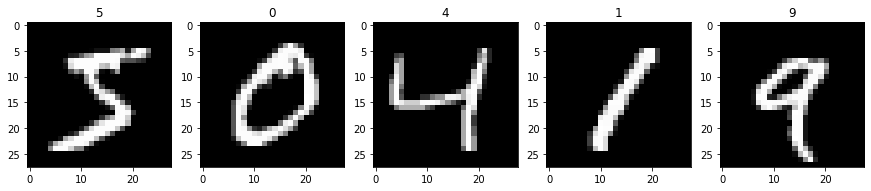

In [ ]:
plt.figure(figsize=(15,5))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i] ,cmap ='gray')
  plt.title(str(np.argmax(y_train[i], 0)))

In [4]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## CNN Models

In [28]:
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="valid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="valid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model6 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="valid"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu",strides= (1,1) ,padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [ ]:
models = [model1,model2,model3,model4,model5,model6]
model_name = ['CNN 1','CNN 2','CNN 3','CNN 4','CNN 5','CNN 6']
historys = [] 

batch_size = 128
epochs = 20
for i in range(len(models)):
  models[i].compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  historys.append(models[i].fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1))
  print(f"\n-------------\n-------------\nmodel {model_name[i]} DONE !!!!!!!!\n-------------\n-------------\n")


### Score

In [187]:
score_cnn = []
for i in range(len(models)): 
  score_cnn.append(models[i].evaluate(x_test, y_test, verbose=0))

In [188]:

for i in range(len(models)):
  print(model_name[i])
  print("Test loss:", score_cnn[i][0])
  print("Test accuracy:", score_cnn[i][1])


model 1
Test loss: 0.05025001987814903
Test accuracy: 0.9836999773979187
model 2
Test loss: 0.024924447759985924
Test accuracy: 0.9922999739646912
model 3
Test loss: 0.02081046998500824
Test accuracy: 0.9937000274658203
model 4
Test loss: 0.028831005096435547
Test accuracy: 0.9929999709129333
model 5
Test loss: 0.04015234857797623
Test accuracy: 0.9915000200271606
model 6
Test loss: 0.035570044070482254
Test accuracy: 0.9923999905586243


### Results

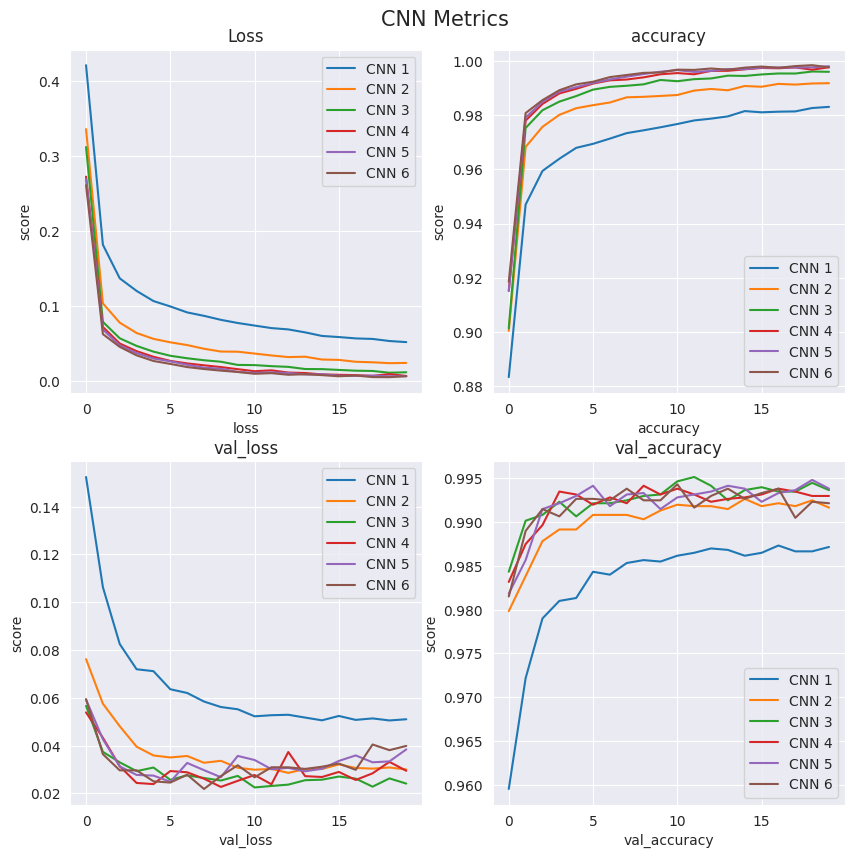

In [211]:
fig = plt.figure(figsize=(10, 10),dpi=100) # Set Figure
plt.suptitle('CNN Metrics',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.subplot(2,2,1)
for i in range(len(models)): plt.plot(historys[i].history['loss'],label=model_name[i])
plt.xlabel('loss')
plt.ylabel('score')
plt.title('Loss')
plt.legend()

plt.subplot(2,2,2)
for i in range(len(models)): plt.plot(historys[i].history['accuracy'],label=model_name[i])
plt.xlabel('accuracy')
plt.ylabel('score')
plt.title('accuracy')
plt.legend()

plt.subplot(2,2,3)
for i in range(len(models)): plt.plot(historys[i].history['val_loss'],label=model_name[i])
plt.xlabel('val_loss')
plt.ylabel('score')
plt.title('val_loss')
plt.legend()

plt.subplot(2,2,4)
for i in range(len(models)): plt.plot(historys[i].history['val_accuracy'],label=model_name[i])
plt.xlabel('val_accuracy')
plt.ylabel('score')
plt.title('val_accuracy')
plt.legend()

plt.savefig(f'P4_Metrics_CNN.png',bbox_inches='tight')

plt.show()

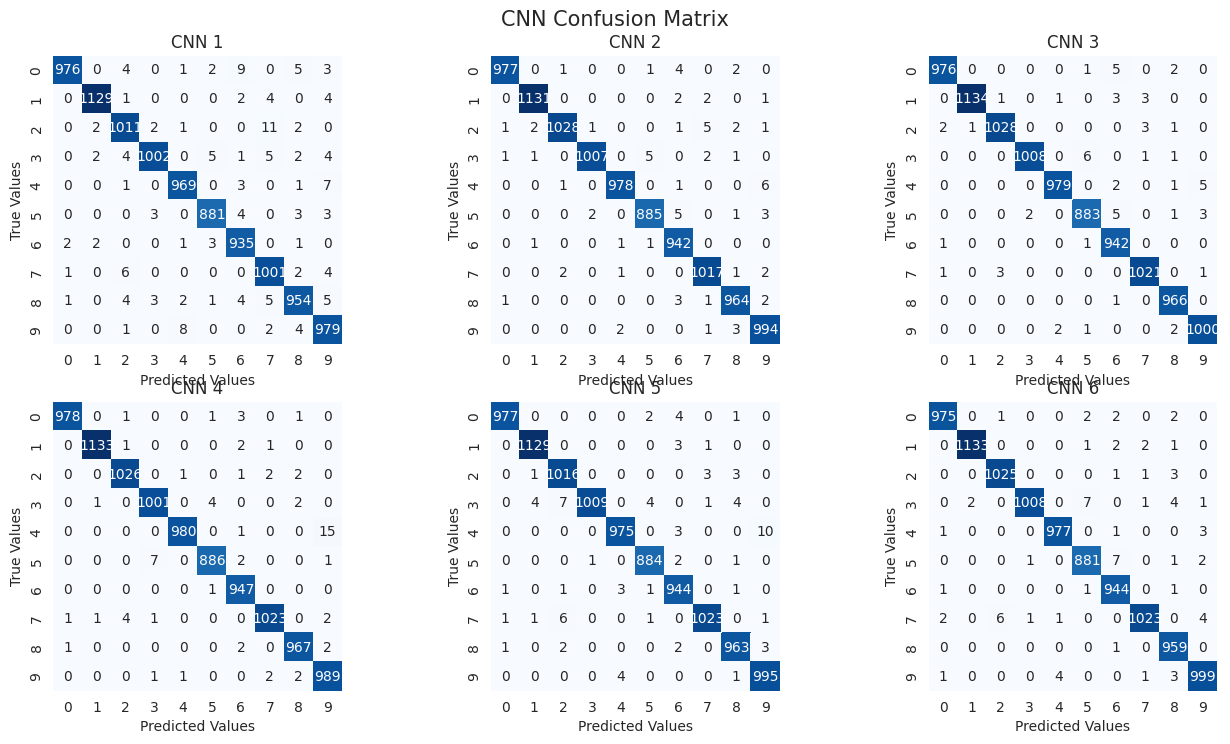

In [212]:
#y_test = np.argmax(y_test, 1) # Decode labels
fig = plt.figure(figsize=(16, 13),dpi=100) # Set Figure
plt.suptitle('CNN Confusion Matrix',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
# Plot Confusion matrix
for i in range(len(models)):
  plt.subplot(3,3,i+1)
  plot_confusion_matrix(models[i],x_test,y_test,model_name[i])

plt.savefig(f'P4_ConfMatr_CNN.png',bbox_inches='tight')  
plt.show()
#https://www.kaggle.com/code/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1

## MLP Models

https://www.kaggle.com/code/athews/mnist-tf-mlp-vs-cnn-vs-transfer-learning

In [59]:
import tensorflow as tf

In [205]:
#reshapinh data for the MLP models
X_train = x_train.reshape(x_train.shape[0], 28, 28)
Y_train = np.argmax(y_train, 1) # Decode labels

X_test = x_test.reshape(x_test.shape[0], 28, 28)
Y_test = np.argmax(y_test, 1) # Decode labels


learning_rate = 0.001
epochs = 20
batch_size = 4000
validation_split = 0.2

#Model Parametes
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

early_stopping = callbacks.EarlyStopping(
        min_delta=0.001, # minimium amount of change to count as an improvement
        patience=20,     # how many epochs to wait before stopping
        restore_best_weights=True,
    )

In [177]:
model_mlp_1 = tf.keras.models.Sequential()
model_mlp_1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
model_mlp_1.add(tf.keras.layers.Dense(units=10, activation='relu'))
model_mlp_1.add(tf.keras.layers.Dense(units=10, activation='softmax'))                          

model_mlp_2 = tf.keras.models.Sequential()
model_mlp_2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
model_mlp_2.add(tf.keras.layers.Dense(units=10, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_2.add(layers.BatchNormalization())
model_mlp_2.add(tf.keras.layers.Dense(units=10, activation='softmax'))                          


model_mlp_3 = tf.keras.models.Sequential()
model_mlp_3.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
model_mlp_3.add(tf.keras.layers.Dense(units=784, activation='relu'))
model_mlp_3.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_3.add(layers.BatchNormalization())
model_mlp_3.add(tf.keras.layers.Dense(units=10, activation='softmax'))   


model_mlp_4 = tf.keras.models.Sequential()
model_mlp_4.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
model_mlp_4.add(tf.keras.layers.Dense(units=784, activation='relu'))
model_mlp_4.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_4.add(layers.BatchNormalization())
model_mlp_4.add(tf.keras.layers.Dense(units=392, activation='relu'))
model_mlp_4.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_4.add(layers.BatchNormalization())
model_mlp_4.add(tf.keras.layers.Dense(units=10, activation='softmax'))                          



model_mlp_5 = tf.keras.models.Sequential()
model_mlp_5.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
model_mlp_5.add(tf.keras.layers.Dense(units=784, activation='relu'))
model_mlp_5.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_5.add(layers.BatchNormalization())
model_mlp_5.add(tf.keras.layers.Dense(units=392, activation='relu'))
model_mlp_5.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_5.add(layers.BatchNormalization())
model_mlp_5.add(tf.keras.layers.Dense(units=196, activation='relu'))
model_mlp_5.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_5.add(layers.BatchNormalization())
model_mlp_5.add(tf.keras.layers.Dense(units=98, activation='relu'))
model_mlp_5.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_5.add(layers.BatchNormalization())
model_mlp_5.add(tf.keras.layers.Dense(units=10, activation='softmax'))                          

model_mlp_6 = tf.keras.models.Sequential()
model_mlp_6.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
model_mlp_6.add(tf.keras.layers.Dense(units=784, activation='relu'))
model_mlp_6.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_6.add(layers.BatchNormalization())
model_mlp_6.add(tf.keras.layers.Dense(units=392, activation='relu'))
model_mlp_6.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_6.add(layers.BatchNormalization())
model_mlp_6.add(tf.keras.layers.Dense(units=196, activation='relu'))
model_mlp_6.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_6.add(layers.BatchNormalization())
model_mlp_6.add(tf.keras.layers.Dense(units=98, activation='relu'))
model_mlp_6.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_6.add(layers.BatchNormalization())
model_mlp_6.add(tf.keras.layers.Dense(units=49, activation='relu'))
model_mlp_6.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_6.add(layers.BatchNormalization())
model_mlp_6.add(tf.keras.layers.Dense(units=24, activation='relu'))
model_mlp_6.add(tf.keras.layers.Dropout(rate=0.2))
model_mlp_6.add(layers.BatchNormalization())
model_mlp_6.add(tf.keras.layers.Dense(units=10, activation='softmax'))                          

In [ ]:
model_mlp = [model_mlp_1,model_mlp_2,model_mlp_3,model_mlp_4,model_mlp_5,model_mlp_6]
model_mlp_name = ['MLP 1','MLP 2','MLP 3','MLP 4','MLP 5','MLP 6',]
history_mlp =[]
for i in range(len(model_mlp)):
  model_mlp[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])
  history_mlp.append(model_mlp[i].fit(x=X_train, y=Y_train, batch_size=batch_size,
                      epochs=epochs, 
                      shuffle=True, 
                      callbacks=[early_stopping],
                      validation_split=validation_split))
  print(f"\n-------------\n-------------\nmodel {model_mlp_name[i]} DONE !!!!!!!!\n-------------\n-------------\n")

### Score 

In [206]:
score_mlp = []
for i in range(len(model_mlp)): 
  score_mlp.append(model_mlp[i].evaluate(X_test, Y_test, verbose=0))

for i in range(len(models)):
  print(model_mlp_name[i])
  print("Test loss:", score_mlp[i][0])
  print("Test accuracy:", score_mlp[i][1])


MLP 1
Test loss: 0.2743815779685974
Test accuracy: 0.9241999983787537
MLP 2
Test loss: 0.6937088966369629
Test accuracy: 0.8837000131607056
MLP 3
Test loss: 0.17297224700450897
Test accuracy: 0.9732999801635742
MLP 4
Test loss: 0.1239716038107872
Test accuracy: 0.9753999710083008
MLP 5
Test loss: 0.10255283117294312
Test accuracy: 0.9690999984741211
MLP 6
Test loss: 0.11389127373695374
Test accuracy: 0.9729999899864197


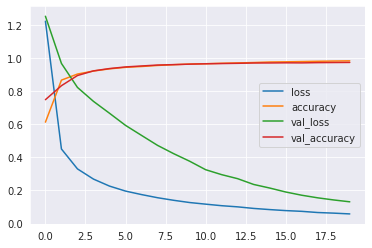

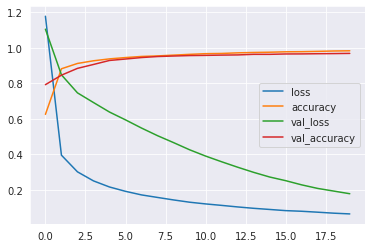

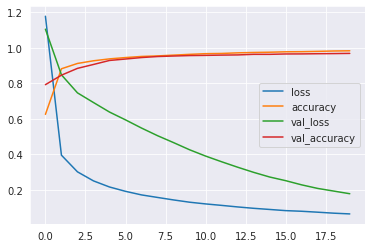

In [158]:
hist2 = pd.DataFrame(history_mpl_1.history)
hist.plot()
hist1.plot()
hist2.plot()

### Results

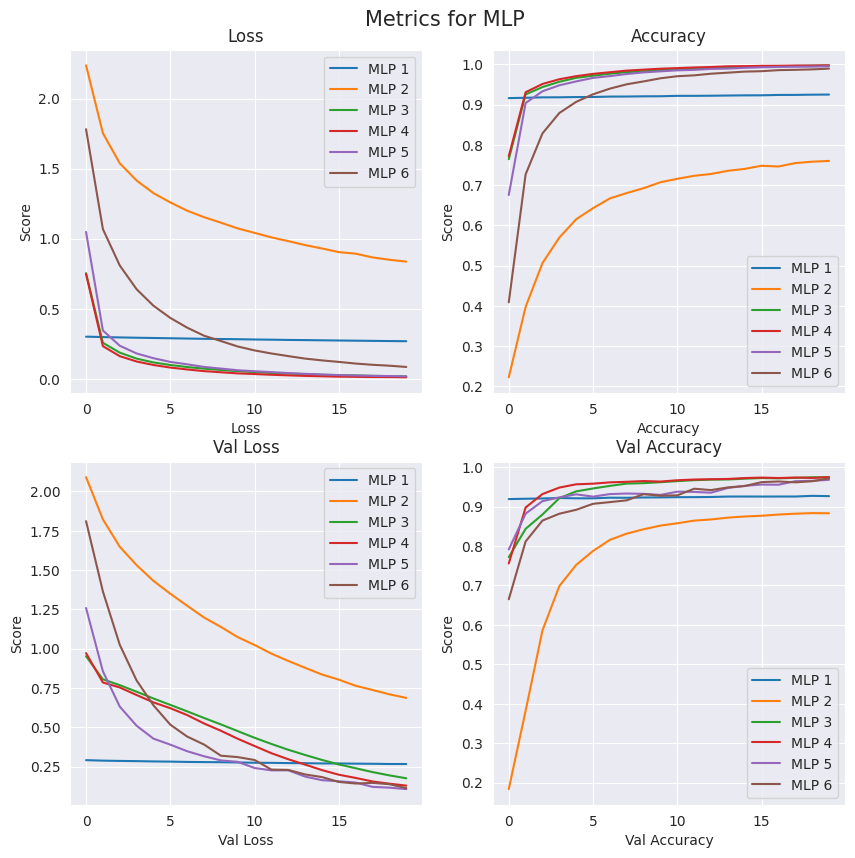

In [213]:
fig = plt.figure(figsize=(10, 10),dpi=100) # Set Figure
plt.suptitle('Metrics for MLP',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
plt.subplot(2,2,1)
for i in range(len(model_mlp)): plt.plot(history_mlp[i].history['loss'],label=model_mlp_name[i])
plt.xlabel('Loss')
plt.ylabel('Score')
plt.title('Loss')
plt.legend()

plt.subplot(2,2,2)
for i in range(len(model_mlp)): plt.plot(history_mlp[i].history['accuracy'],label=model_mlp_name[i])
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('Accuracy')
plt.legend()

plt.subplot(2,2,3)
for i in range(len(model_mlp)): plt.plot(history_mlp[i].history['val_loss'],label=model_mlp_name[i])
plt.xlabel('Val Loss')
plt.ylabel('Score')
plt.title('Val Loss')
plt.legend()

plt.subplot(2,2,4)
for i in range(len(model_mlp)): plt.plot(history_mlp[i].history['val_accuracy'],label=model_mlp_name[i])
plt.xlabel('Val Accuracy')
plt.ylabel('Score')
plt.title('Val Accuracy')
plt.legend()

plt.savefig(f'P4_Metrics_MLP.png',bbox_inches='tight')

plt.show()

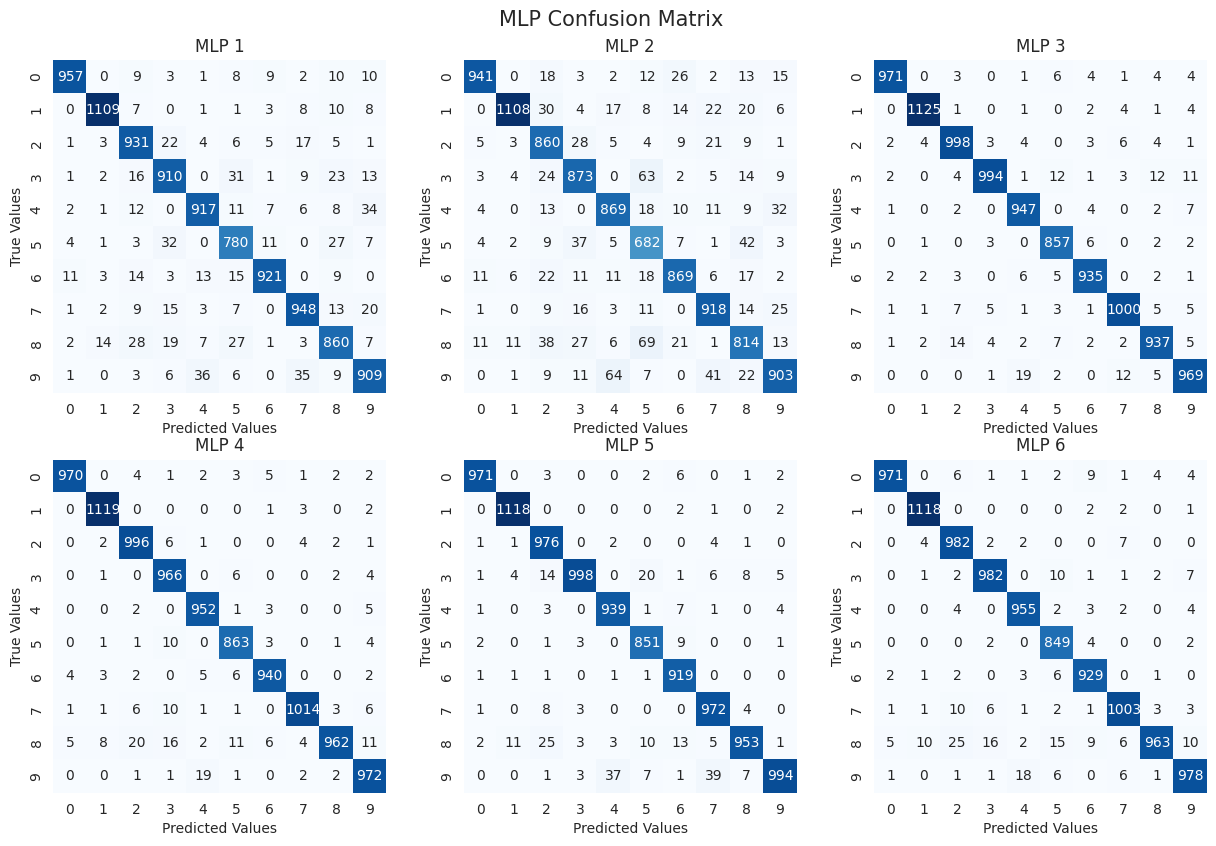

In [214]:
#y_test = np.argmax(y_test, 1) # Decode labels
fig = plt.figure(figsize=(15, 15),dpi=100) # Set Figure
plt.suptitle('MLP Confusion Matrix',  y=0.90, horizontalalignment='center', verticalalignment='bottom', fontsize = 15)
# Plot Confusion matrix
for i in range(len(model_mlp)):
  plt.subplot(3,3,i+1)
  plot_confusion_matrix(model_mlp[i],x_test,y_test,model_mlp_name[i])
plt.savefig(f'P4_ConfMatri_MLP.png',bbox_inches='tight')  
plt.show()
#https://www.kaggle.com/code/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1

# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)

https://www.w3schools.com/python/python_classes.asp

https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73?gi=21e42fd28916

https://www.kaggle.com/code/phelpsmemo/cap-351-neurocomputacao-projeto4-autoencoder

https://www.kaggle.com/code/rvislaywade/visualizing-mnist-using-a-variational-autoencoder

https://youtu.be/Ey8IZQl_lKs




In [ ]:
# for i in range(len(models)):
#   print(f"\n-------------\n-------------\nMODEL {model_name[i]} \n-------------\n-------------\n")
#   print(models[i].summary())


for i in range(len(model_mlp)):
  print(f"\n```\n#### MODEL {model_mlp_name[i]}\n```\n")
  print(model_mlp[i].summary())


  